# Problem Definition
To predict the selling price of a used car, given its parameters.

In [1]:
# Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Data Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Modelling and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [2]:
car_data = pd.read_csv('data/car-data.csv')
df = car_data.copy()

In [3]:
# Splitting the data to Features and Labels
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

In [4]:
# Encoding
categorical_features = ["Car_Name", "Fuel_Type", "Seller_Type", "Transmission"]
one_hot = OneHotEncoder(handle_unknown='ignore')
transformer = ColumnTransformer(
    [('one_hot', one_hot, categorical_features)],
    remainder='passthrough'
)
transformed_X = transformer.fit_transform(X)

In [5]:
# Creating Train and Test splits
X_train, X_test, y_train, y_test = train_test_split(
    transformed_X,
    y,
    test_size=0.2,
    random_state=42
)

-2.071031984624407


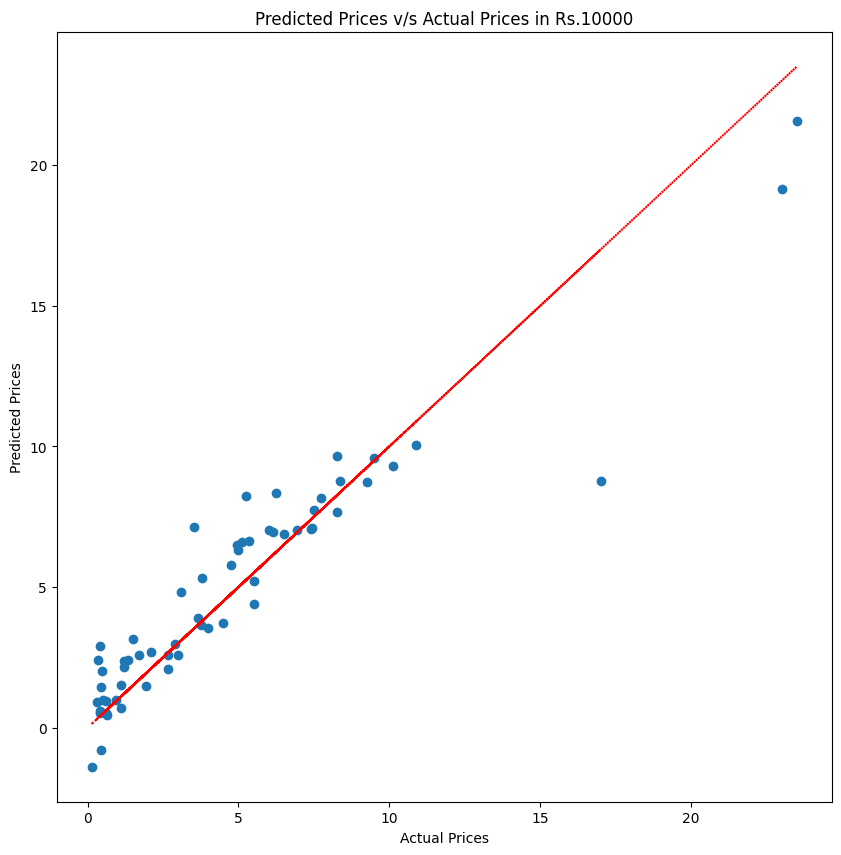

In [6]:
# Regression model
reg = LinearRegression(n_jobs=-2)
scores = cross_val_score(
    reg, 
    transformed_X, 
    y,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-2
)
print(np.mean(scores)) # Average Root Mean Squared Error

# Plotting Predicted Prices v/s Actual Prices
reg.fit(X_train, y_train)
y_preds = reg.predict(X_test)

fig = plt.figure(figsize=(10,10))
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color='red', linestyle='dotted')
plt.title('Predicted Prices v/s Actual Prices in Rs.10000')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices');

# Summary

The Linear Regression model is able to predict the prices of used cars with a Negative Root Mean Squared Error of `-2.071031984624407`.
The model was evaluated using 5-fold cross-validation, using training data consisting of `240` samples, and over test data of `61` samples.